Prep

In [1]:
!wget https://nlp100.github.io/data/neko.txt
!apt install mecab libmecab-dev mecab-ipadic-utf8

--2022-01-21 05:56:29--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.007s  

2022-01-21 05:56:29 (127 MB/s) - ‘neko.txt’ saved [975789/975789]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 29.0 MB of archives.
After this operatio

In [2]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [3]:
import matplotlib.pyplot as plt

30

In [4]:
filename = './neko.txt.mecab'

sentences = []
morphs = []

with open(filename, mode='r+t') as f:
  for line in f:
    if line != 'EOS\n':
      div = line.split('\t')
      if len(div) != 2 or div[0] =='':
        continue
      attr = div[1].split(',')
      morph = {'surface':div[0], 'base':attr[6], 'pos':attr[0], 'pos1':attr[1]}
      morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

sentences[2]

[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]

31

In [5]:
verb_surf = set()
for sentence in sentences:
  for m in sentence:
      if m['pos'] == '動詞':
        verb_surf.add(m['surface'])

verb_surf

{'怪しま',
 '溶かし',
 '甘える',
 '聞かさ',
 'きまっ',
 '説き',
 '言っ',
 '持て',
 '籠っ',
 '間に合っ',
 'いら',
 '於け',
 '伝え',
 '引き',
 '染み',
 '突き出し',
 'かため',
 '縛り付け',
 '済ませ',
 'しだす',
 'あらわれ',
 'あるか',
 '潰れる',
 '謹ん',
 '送る',
 '吹き込む',
 '仰向い',
 'おっしゃろ',
 '書き散らし',
 'だす',
 '済ん',
 '作り',
 '引きずり',
 'あれ',
 '折れ',
 'じゃれ',
 '移っ',
 '掻ける',
 '急い',
 'れりゃ',
 '弾け',
 '逢う',
 '気に入ら',
 '煙り',
 '描き出し',
 '通さ',
 'せ',
 '塗りつけ',
 '使える',
 'ちまう',
 '堪り',
 'おどかさ',
 '娶る',
 'やれ',
 '知ろ',
 '暮れる',
 '疲れ',
 '視る',
 '通り抜け',
 'こなし',
 '分っ',
 '断り',
 '抛り',
 '間に合い',
 '立ち去っ',
 'してやれ',
 '放つ',
 '勝つ',
 '呑み込ま',
 '済む',
 'いじっ',
 '舐め',
 '解く',
 '戒め',
 '下し',
 '見離さ',
 'まわる',
 '与えん',
 'ひろげる',
 '鋳',
 '期す',
 '繙け',
 '見上げる',
 '勤まる',
 '撚',
 '勤め',
 '飲ま',
 '過ぎれ',
 '祝う',
 '酔っ払っ',
 '飛び降りる',
 '潜り込ん',
 '読ん',
 '嗅い',
 '下がっ',
 '恐る',
 '至っ',
 '評する',
 '潰し',
 '変る',
 '攻め',
 '滑っ',
 '陳べ',
 '足ら',
 '戻ら',
 '云い',
 '穿い',
 'つかれ',
 '惜しめ',
 '立ち退く',
 '察し',
 '持ち出し',
 '返り',
 '割っ',
 '思い出し',
 '窘め',
 '覚ます',
 'がたつく',
 '教える',
 '揺れ',
 '縫いつけ',
 '越さ',
 '落ちつき',
 '訴える',
 '足そ',
 '通り掛っ',
 '心得る',
 '習う',
 '萌す',
 '綻び',


32

In [6]:
verb_base = set()
for sentence in sentences:
  for m in sentence:
      if m['pos'] == '動詞':
        verb_base.add(m['base'])

verb_base

{'甘える',
 '食み出す',
 'ちる',
 '尽くす',
 'だます',
 '強いる',
 'しだす',
 '潰れる',
 '送る',
 '吹き込む',
 'だす',
 '当てる',
 '掻ける',
 '逢う',
 '捻り出す',
 '拱く',
 '嚇す',
 '寄る',
 'たらす',
 '使える',
 'ちまう',
 '娶る',
 '暮れる',
 '視る',
 '振り上げる',
 '恥づ',
 '試す',
 'なやむ',
 '放つ',
 '勝つ',
 '平伏す',
 '済む',
 '解く',
 'まわる',
 '接す',
 '茂る',
 'ひろげる',
 '察す',
 '期す',
 '嵌める',
 '見上げる',
 '勤まる',
 '睨み合う',
 'こらす',
 'いざる',
 'かたまる',
 '命じる',
 '祝う',
 '飛び降りる',
 '練る',
 '恐る',
 '評する',
 '変る',
 '引っ繰り返す',
 'かたちづくる',
 '春めく',
 'にたてる',
 '見下ろす',
 '植え付ける',
 '押し込める',
 '立ち退く',
 'まがる',
 '蹴る',
 '覚ます',
 'がたつく',
 '教える',
 '充ちる',
 '定める',
 '倦む',
 'がする',
 '戒める',
 '訴える',
 '買い被る',
 'まじる',
 '心得る',
 '習う',
 '萌す',
 '訪う',
 'のしかかる',
 '注ぐ',
 '吐く',
 '飲み込む',
 '取りつく',
 'そり返る',
 '背く',
 '争う',
 '覆す',
 'やける',
 '取りはずす',
 'さめる',
 '吸い出す',
 '切れる',
 '書き立てる',
 '営む',
 '冒す',
 '頼む',
 'あびる',
 '堪える',
 'せまる',
 '帰す',
 '行ける',
 '引っ張る',
 '寝かす',
 '極まる',
 '括る',
 '素っ破抜く',
 '遣わす',
 '整える',
 '預る',
 '減る',
 '間違える',
 'みる',
 '有す',
 '枯れる',
 '割く',
 'ぱくつく',
 'めでる',
 '緩める',
 'ぶんなぐる',
 '翳す',
 '保つ',
 '諦める',
 '減ずる',
 '打ち解ける',
 '覚す',
 

33

In [7]:
no = set()
for sentence in sentences:
  for i in range(1,len(sentence)-1):
    if sentence[i-1]['pos']=='名詞' and sentence[i]['surface']=='の' and sentence[i+1]['pos']=='名詞':
      no.add(sentence[i-1]['surface'] + sentence[i]['surface'] + sentence[i+1]['surface'])

for n in list(no)[:10]:
  print(n)

滑りの難所
国民の歓喜
博士の学位
顱の頭
猫の企て
君子の敵
君の懐
館の君子
上級生の命令
二の方法


34

In [8]:
cont_noun = set()
for sentence in sentences:
  tmp = list()
  for char in sentence:
    if char['pos']=='名詞':
      tmp.append(char['surface'])
    else:
      if len(tmp)>0:
        cont_noun |= set(tmp)
      tmp = list()

cont_noun

{'鼻息',
 '方々',
 '良夜',
 '布',
 '停車場',
 'ぎりですか',
 '腕',
 '本体',
 '交叉',
 '同等',
 '荘厳',
 'ラファエル',
 '復興',
 '身内',
 '田舎',
 '調和',
 '多年',
 '以下',
 '肋骨',
 '答弁',
 '糸織',
 'そのもの',
 '棒鱈',
 'そちら',
 '放蕩',
 'カーテル・ムル',
 '久留米がすり',
 '水仙',
 '間隔',
 '旗本',
 '袱紗',
 '見物人',
 '稀',
 '女郎',
 '時半',
 '適宜',
 'いろいろ',
 '奇警',
 '華族',
 '暴威',
 '手前',
 'これら',
 '大仏',
 '大人',
 'じゅう',
 '身代',
 '健啖',
 '奥様',
 '作り',
 '横丁',
 '無意味',
 '富',
 '欠点',
 '信',
 '八木',
 '音色',
 '巻煙草',
 'ひび',
 '部類',
 '併発',
 'おのれ',
 '無法者',
 '登校',
 '瓦解',
 '戯',
 '道中双六',
 '連結',
 '史',
 '掛声',
 '食意地',
 '男振り',
 '早口',
 '展開',
 '安直',
 '合図',
 '付き',
 '大抵',
 '茶屋',
 '釦',
 '平時',
 '而生',
 '壺',
 '脱線',
 '治療',
 '病人',
 '者',
 '隅田川',
 '幸い',
 'きり',
 '頂戴',
 'お前',
 '比喩',
 '別人',
 '悪寒',
 '本人',
 '鵯越',
 '当番',
 '往来',
 '衛生',
 '器械',
 '夜光',
 '余事',
 '金',
 '唇',
 '紋',
 '負けん気',
 'つむじ',
 '常態',
 '越後',
 '落着',
 '一貫',
 '名',
 '因',
 '臭',
 '反問',
 '拇指',
 '物思い',
 '窮措大',
 '紅',
 'ら',
 '廻転',
 '憂',
 '申し訳',
 '著書',
 '浩然',
 '潰し',
 'Savage',
 '杓子',
 '下痢',
 '午後',
 '多々良',
 '山葵',
 '皎',
 '端書',
 'α',
 '象牙',
 '竹槍',
 '相対',
 '彼女',
 '盃'

35

In [9]:
occur = dict()
for sentence in sentences:
  for m in sentence:
    if m['pos']!='記号':
      if m['base'] not in occur:
        occur[m['base']] = 1
      else:
        occur[m['base']] += 1

occur = sorted(occur.items(), key=lambda item: item[1], reverse=True)

36

In [10]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 19.8 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=0639b8958fe057dd6cc2281fc3e937d6d33c5146e425022504afbfeb743b5fc5
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [11]:
import japanize_matplotlib

['の', 'て', 'は', 'に', 'を', 'だ', 'と', 'が', 'た', 'する']


<BarContainer object of 10 artists>

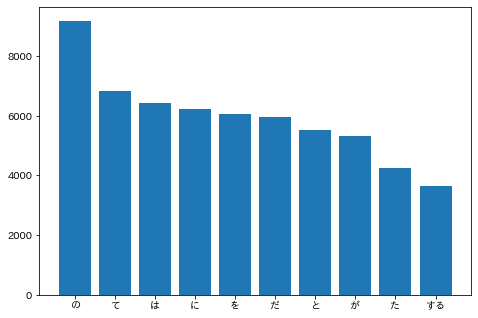

In [12]:
top10 = occur[:10]
words = [top10[i][0] for i in range(len(top10))]
val = [top10[i][1] for i in range(len(top10))]
print(words)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words, val)

37

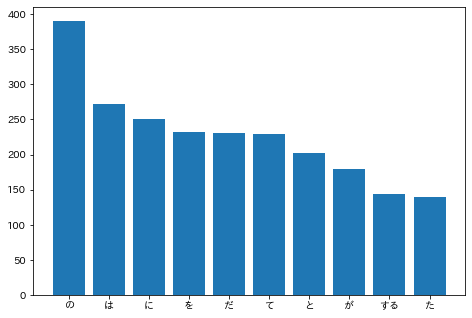

In [13]:
cooccur = dict()

for sentence in sentences:
  tmp=list()
  for word in sentence:
    if word['pos']!='記号':
      tmp.append(word['base'])
  if '猫' in tmp:
    for w in tmp:
      if w!='猫':
        if w not in cooccur:
          cooccur[w]=1
        else:
          cooccur[w]+=1

sorted_coocur = sorted(cooccur.items(), key=lambda item: item[1], reverse=True)
top10 = sorted_coocur[:10]

words = [top10[i][0] for i in range(len(top10))]
val = [top10[i][1] for i in range(len(top10))] 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words, val)
plt.show()

38

dict_keys([9194, 6848, 6420, 6243, 6071, 5972, 5508, 5337, 4267, 3657, 3052, 2479, 2320, 2191, 2084, 2031, 1777, 1568, 1529, 1408, 1207, 1164, 1146, 1120, 1034, 987, 981, 973, 932, 719, 696, 675, 657, 649, 636, 617, 602, 576, 554, 546, 539, 502, 481, 460, 450, 414, 410, 381, 347, 346, 345, 340, 324, 319, 317, 313, 312, 311, 303, 294, 286, 282, 274, 272, 269, 268, 261, 260, 250, 248, 246, 241, 238, 236, 234, 231, 227, 220, 217, 216, 213, 208, 206, 205, 199, 195, 194, 193, 189, 185, 179, 176, 175, 173, 172, 169, 168, 166, 159, 158, 154, 152, 151, 150, 149, 148, 147, 143, 142, 140, 134, 133, 132, 131, 129, 127, 126, 125, 121, 120, 119, 118, 116, 115, 114, 113, 112, 111, 110, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 91, 90, 89, 88, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29

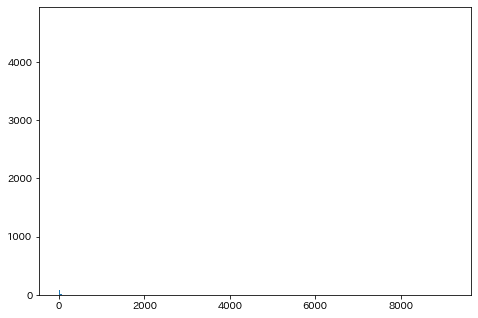

In [14]:
occur #list containing ('word', occurence)

histogram = dict()
for el in occur:
  if el[1] not in histogram:
    histogram[el[1]]=1
  else:
    histogram[el[1]]+=1

occurence = histogram.keys()
types = histogram.values()
print(occurence)
print(types)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(occurence, types)
plt.show()

39

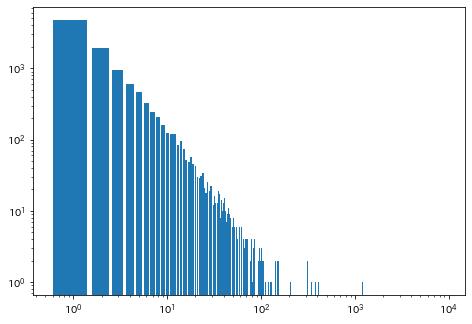

In [15]:
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(occurence,types)
plt.yscale('log')
plt.xscale('log')
plt.show()

TypeError: ignored

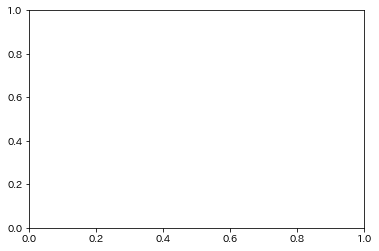

In [16]:
data = np.r_[occurence, types]
fig=plt.figure()
plt.hist(data, bins=np.logspace(0,4))#?
plt.yscale('log')
plt.xscale('log')
plt.show()